## Importing libraries

In [66]:
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt

## 1. Facts and Figures about our dataset (Understanding the data)
#### Read the csv into a dataframe(df) and read the first 5 rows

In [2]:
df=pd.read_csv("Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
len(df["Request id"].unique())

6745

### Show the number of rows and columns in the dataset

In [5]:
df.shape

(6745, 6)

### Show the number of NANs in each column

In [6]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### Show the % of NANs in each column

In [7]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

### Show the details of the given dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


### Finding out the statistical summary for both numerical and object columns in one place

In [64]:
df.describe(include="all")

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
count,6745.000000,6745,4095.000000,6745,6745,2831,6745.000000,6745.000000,6745
unique,NaN,2,NaN,3,5618,2598,NaN,NaN,5
top,NaN,City,NaN,Trip Completed,2016-07-11 17:57:00,2016-07-12 21:04:00,NaN,NaN,Evening_Rush
freq,NaN,3507,NaN,2831,6,4,NaN,NaN,2342
first,NaN,NaN,NaN,NaN,2016-07-11 00:00:00,2016-07-11 00:51:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2016-07-15 23:59:58,2016-07-16 01:09:24,NaN,NaN,NaN
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN,12.956709,13.010971,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN,6.504052,1.422743,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,11.000000,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN,7.000000,12.000000,NaN


## 2. Cleaning/Handling the data

In [9]:
df["Request timestamp"].value_counts()

11/7/2016 17:57        6
11/7/2016 9:40         6
11/7/2016 19:02        6
11/7/2016 8:37         6
11/7/2016 22:00        5
                      ..
14-07-2016 15:00:36    1
11/7/2016 13:02        1
15-07-2016 21:12:45    1
13-07-2016 18:23:10    1
15-07-2016 06:43:04    1
Name: Request timestamp, Length: 5618, dtype: int64

In [10]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [11]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [12]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [14]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [16]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [17]:
req_hour=df["Request timestamp"].dt.hour

In [18]:
len(req_hour)

6745

In [19]:
df["req_hour"]=req_hour
df["req_hour"]

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: req_hour, Length: 6745, dtype: int64

In [21]:
req_day=df["Request timestamp"].dt.day

In [22]:
df["req_day"]=req_day

The NaNs/missing values in the column “Driver_Id” can be ignored. This is because we see that since there were NO CARS AVAILABLE at point of the day after the user tried to book a cab, no driver was allotted the trip, and hence the driver_id is missing. Similarly, we can ignore the NaNs/missing values in the column “Drop timestamp” as for all of them, the trip is either CANCELLED or NO CARS AVAILABLE. In both the columns, the data is missing due to a genuine reason and not that it got lost during the data collection. Hence, I have not substituted them with any other values based on any logic

## 3. Visualize and Analyze

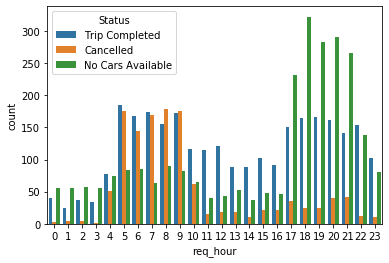

In [25]:
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

C:\Users\cmsub\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


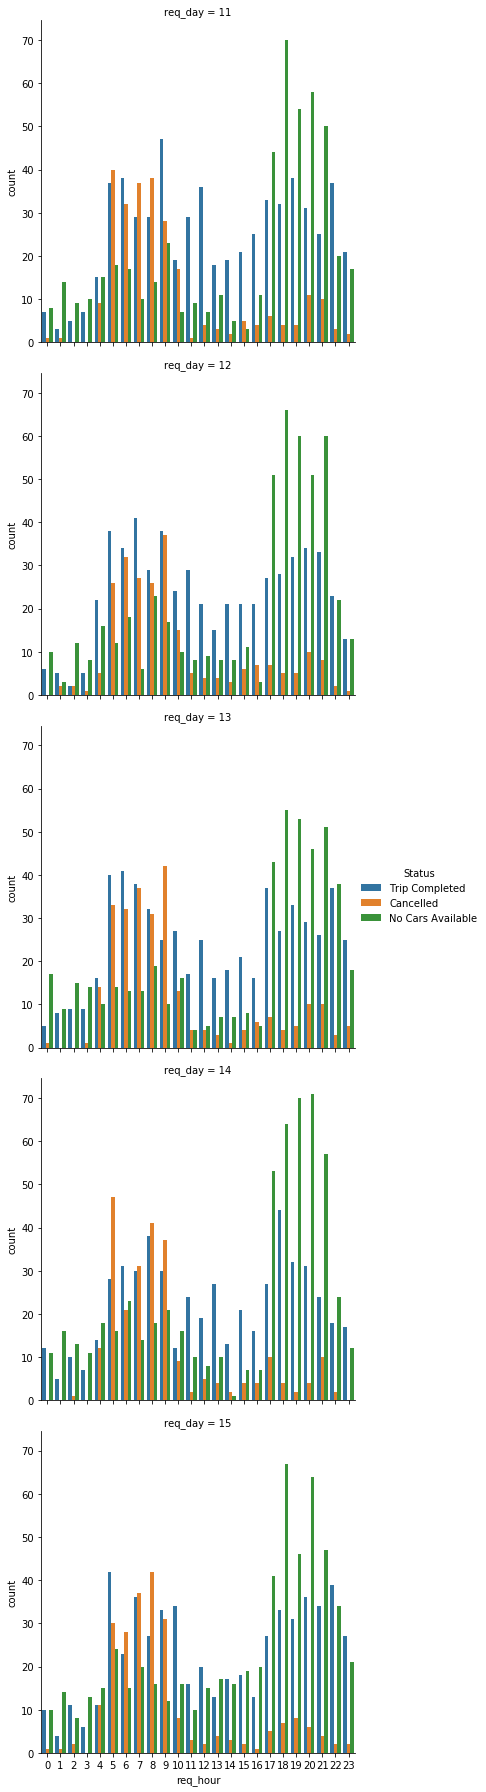

In [28]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Status",kind="count")
plt.show()

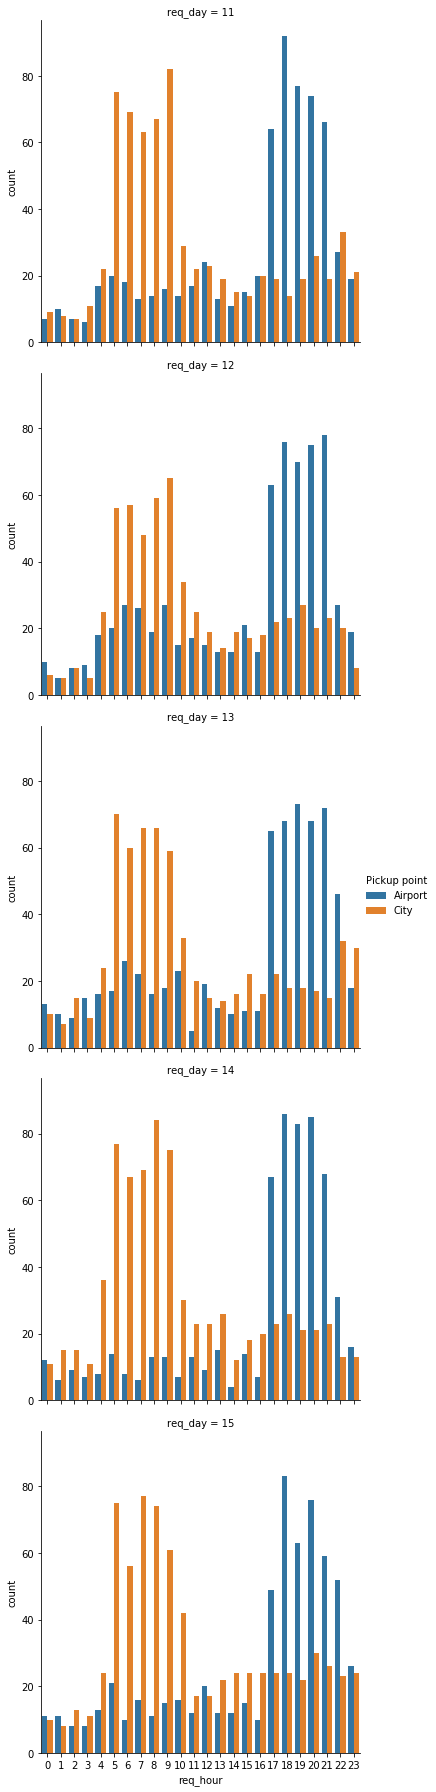

In [29]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Pickup point",kind="count")
plt.show()

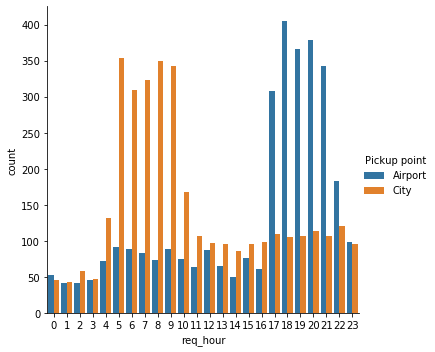

In [30]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [31]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [32]:
df["Time_Slot"]=0

In [33]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


### Hour Categories:
#### <5           "Pre_morning"
#### 5<=x<10   == "Morning Rush"
#### 10<=x<17     'Day_time'
#### 17<=x<22     "Evening rush"
#### else         "Late night"


In [34]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

In [35]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [36]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

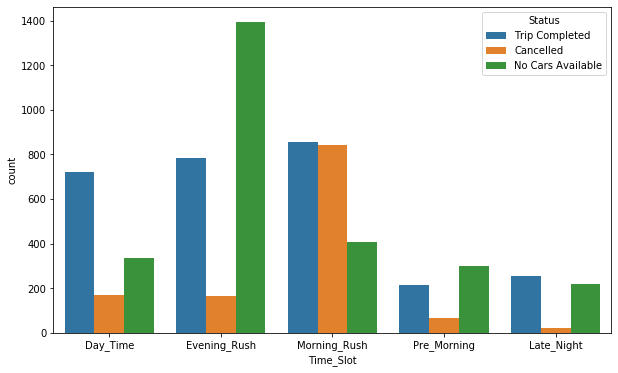

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

In [38]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']


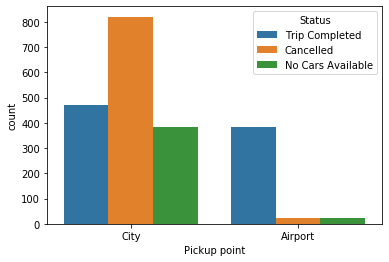

In [72]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)
plt.show()

# Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [40]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [41]:
df_airport_cancelled.shape[0]

23

In [42]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [43]:
df_city_cancelled.shape[0]

820

# Supply and demand

In [44]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


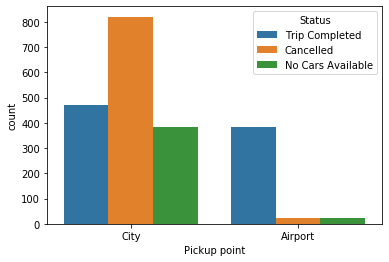

In [62]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)
plt.show()

In [45]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [46]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [47]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [48]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

# Supply and Demand for evening rush

In [49]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']


In [50]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

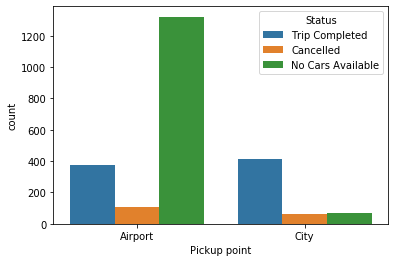

In [51]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)
plt.show()

In [52]:
df_city_cancelled.shape[0]

60

In [53]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [54]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [55]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [56]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [57]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

# Severity problem at each location by looking at cancellation of cabs in each of the pickup location

In [58]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [59]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

# Severity of problem by location in morning rush

In [60]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [61]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

## Key Takeaways:

1. We understood the dataset with the number of user requests that were done and the number of columns(6745,6) along with other facts such as number/percentage of NaNs in each column and format of DateTime in the request and drop timestamp columns.
2. We standardized the format of DateTime in the request and drop timestamp columns.
3. Figured a logical reason as to why the NaNs in Driver_id and drop timestamp columns should be ignored.
4. Extracted the day number and hour from the request timestamp column to perform a deeper analysis.
5. Between hours 5 AM-9 AM, the load on cabs are high with an almost equal amount of trips getting completed and canceled.
6. Between hours 5 PM-9 PM, the load on cabs is significantly high. Hence, there is a mismatch between cab demand and availability. Hence, we see more of “No cars Available Status”.
7. Between hours 5 AM-9 AM, the users from the city are significantly high.
8. Between hours 5 PM-9 PM, the users from the Airport are significantly high.
9. The “Morning_Rush” and “Evening_Rush” are the hours with maximum load(i.e more number of users requesting cab services).
10. We also saw the load during “Morning_rush” and “Evening_Rush” from both pick-up points “City” and “Airport”.
11. During the evening rush hour, we saw a significant number of NO CARS AVAILABLE status for the trip bookings from “Airport”.

## The Reason for the Issue of the Supply-Demand Gap
### Peak Morning Slot Problem
1. We observed that in the Peak Morning Slot where the demand for City to Airport trips are high, there are maximum number of trip cancellations leading to great Gap in the Demand & Supply.
2. Out of the Demand or Total Requests of 1678, the Supply or Trips Completed were only 472, with high Gap of 1205.
3. This is because the trip to Airport from the City usually takes a longer time. Once the driver is in the Airport, he will have a longer idle time depending on the on the flights patterns. In the mornings, a lot of flights usually leave the city and less flights arrive. Also, it doesn’t make any economical sense to come back empty from the Airport to the City.
4. All these factors lead to high cancellation rate for trips from City to Airport.

### Peak Evening Slot Problem
1. We observed that in the Peak Evening Slot where the demand for Airport to City trips are high, there are maximum number of “No Cars Available” leading to great Gap in the Demand & Supply.
2. Out of the Demand or Total Requests of 1800, the Supply or Trips Completed were only 373, with high Gap of 1427.
3. This is because by the night, a lot of flights including the international ones start arriving at the airport. This creates a high demand for the cars. Also, the Uber driver partners start retiring for the day as the dawn proceeds leading to a high non availability of the cars.
4. These factors lead to high “No Cars Available” issue for trips from Airport to City.

## Analysis — Demand, Supply and Gap in the City

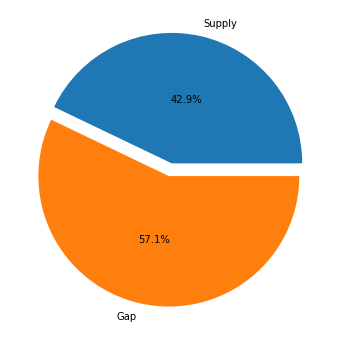

In [91]:
supply_city = df.loc[(df["Pickup point"]=="City") & (df["Status"]=="Trip Completed")].shape[0]
gap_city = df.loc[(df["Pickup point"]=="City") & ((df["Status"]=="Cancelled") | (df["Status"]=="No Cars Available"))].shape[0]

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=[supply_city, gap_city], autopct="%.1f%%", explode=[0.05]*2, labels=["Supply", "Gap"], pctdistance=0.5)
plt.show()

## Analysis — Demand, Supply and Gap in the Airport

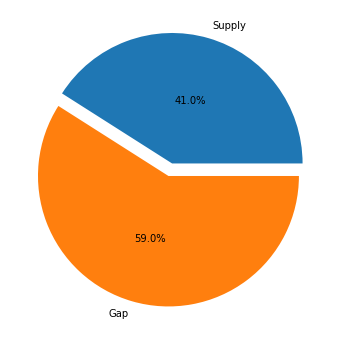

In [90]:
supply_airport = df.loc[(df["Pickup point"]=="Airport") & (df["Status"]=="Trip Completed")].shape[0]
gap_airport = df.loc[(df["Pickup point"]=="Airport") & ((df["Status"]=="Cancelled") | (df["Status"]=="No Cars Available"))].shape[0]

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=[supply_airport, gap_airport], autopct="%.1f%%", explode=[0.05]*2, labels=["Supply", "Gap"], pctdistance=0.5)
plt.show()

## Recommendations to Resolve the Supply-Demand gap.
1. Uber should provide higher monetary incentives for driver taking a Peak Morning trip from City to Airport.
2. Setting targets for drivers to take up the City to Airport or Airport to City trips and then suitably rewarding them through lucky draw schemes, gift vouchers.
3. Incentivize Airport to City trips in the night so that more drivers from the City reach the Airport thus increasing the availability of the cars.
4. Ask its drivers to not retire from services early in the evening.
5. Conduct orientation classes for drivers and let them know about the insights obtained analysis of this problem so that the drivers know where to be at what time of the day.